<a href="https://colab.research.google.com/github/Sohamch03/Google-Search-Analysis/blob/main/Google_Search_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pytrends

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pytrends.request import TrendReq

Setup Pytrend library and keyword define

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = 'cloud computing'

Data Request

In [4]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

Country wise Interest

In [5]:
# Add a delay before making the request to avoid rate limits
import time

# Add a delay before making the next request
time.sleep(60)

region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by =keyword, ascending = False).head(15)

<ipython-input-6-e22215c45e40>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword], y=region_data.index, palette="Blues_d")


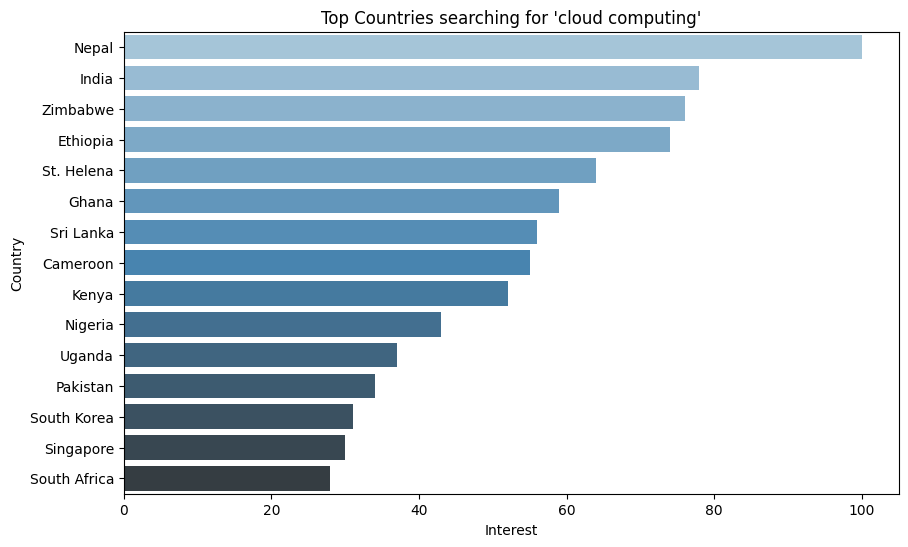

In [6]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette="Blues_d")
plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()


World Map

In [7]:
region_data= region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color = keyword,
                    title=f"Search Interest for'{keyword}'by country",
                    color_continuous_scale='Blues')
fig.show()

Time Wise Interest

In [8]:
time_df = pytrends.interest_over_time()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



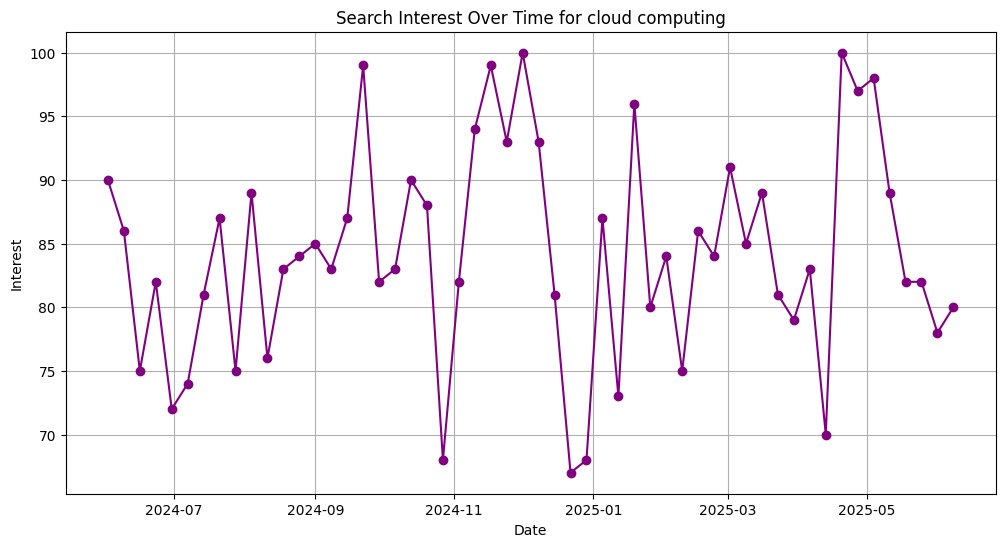

In [9]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f'Search Interest Over Time for {keyword}')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.show()

Multiple Keywords Compare

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



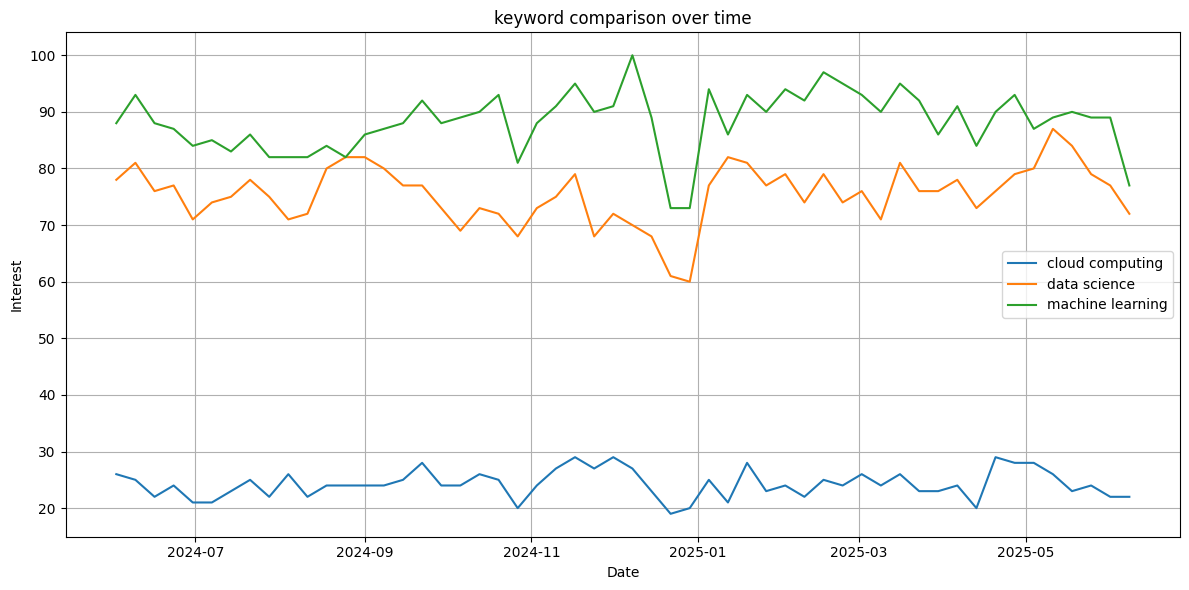

In [10]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12, 6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
